# Introduction

This notebook contains some examples of TimeAtlas usages.


## Work with TimeSeries

The two essential components are a Pandas Series and a DatetimeIndex

In [1]:
from timeatlas import TimeSeries
from pandas import Series, DatetimeIndex

index = DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04','2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08','2019-01-09', '2019-01-10', '2019-01-11', '2019-01-12'])
my_series = Series([0.4, 1.0, 0.7, 0.6, 0.4, 1.0, 0.7, 0.6, 0.4, 1.0, 0.7, 0.6], index=index)

ts = TimeSeries(my_series)

In [2]:
ts

            values
2019-01-01     0.4
2019-01-02     1.0
2019-01-03     0.7
2019-01-04     0.6
2019-01-05     0.4
2019-01-06     1.0
2019-01-07     0.7
2019-01-08     0.6
2019-01-09     0.4
2019-01-10     1.0
2019-01-11     0.7
2019-01-12     0.6

You can check its main characteristics with `describe()`

In [3]:
ts.describe()

count    12.000000
mean      0.675000
std       0.226134
min       0.400000
25%       0.550000
50%       0.650000
75%       0.775000
max       1.000000
Name: values, dtype: float64

And visualize it with the `plot()` function

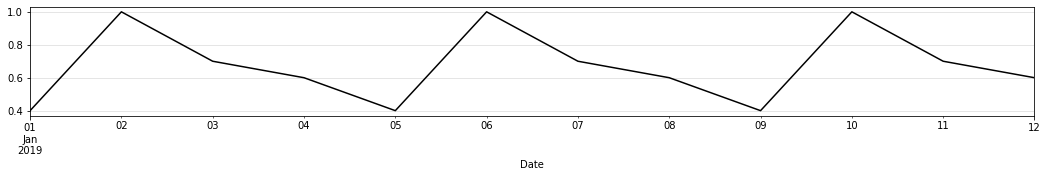

In [4]:
ts.plot()

## Add Metadata to a TimeSeries

In [5]:
from timeatlas import Metadata, types

# You can use some typed metadata object
my_unit = types.Unit("power", "W", "float")
my_sensor = types.Sensor(2902, "HB/floor2/22-23C/Prises_Power_Tot")
my_coords = types.Coords(46.796611, 7.147563)

# Or use Python dictionaries
my_location = {
    "building" : "Blue Factory",
    "floor" : "12",
    "room"  : "22C"
}

my_dict = {
    "unit": my_unit,
    "sensor": my_sensor,
    "location": my_location,
    "coordinates": my_coords
}

# Create the Metadata object
my_meta = Metadata(my_dict)

In [6]:
my_meta

{'unit': <timeatlas.types.unit.Unit at 0x134aa2450>,
 'sensor': Sensor ID 2902,
 'location': {'building': 'Blue Factory', 'floor': '12', 'room': '22C'},
 'coordinates': 46.796611, 7.147563}

## Define a TimeSeries with Metadata

In [7]:
ts_meta = TimeSeries(my_series, my_meta)

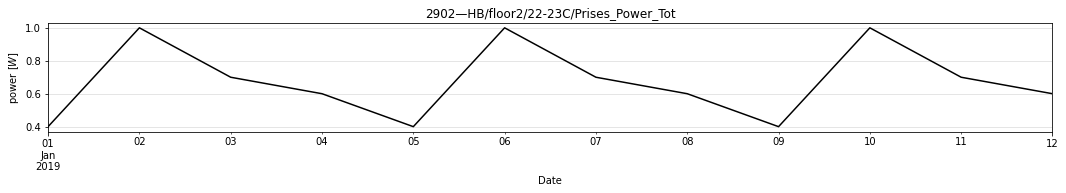

In [8]:
ts_meta.plot()

## Predict next values

Some definitions:

- `time series` : self-explanatory, i.e. the TimeSeries object
- `horizon` : the duration to predict after the last value of the time series
- `frequency`: the number of values per unit of time. Usually, the frequency is given in Pandas offset aliases (https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

```
                                horizon
   |-------------------------|- - - - - -|
                             |||||||||||||
           time series         frequency

```

In [9]:
from timeatlas import models

In [10]:
m = models.Prophet()

In [11]:
m.fit(ts_meta)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 8.


In [12]:
ts_meta.metadata["sensor"]

Sensor ID 2902

In [13]:
Y_hat = m.predict('4 days')

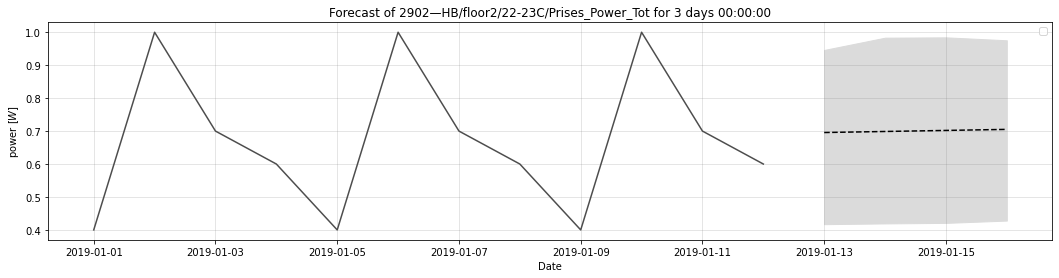

In [14]:
from timeatlas import plots

plots.prediction(m.X_train, Y_hat)